Importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read data

In [3]:
data = pd.read_csv("diabetic_kidney_disease.csv")

In [5]:
#showing data
data.head()

,FBG (mg/dL),HbA1C (%),Total cholesterol (mg/dL),UACR (mg/g creatinine)
0,140,8.7,144,16.0
1,135,7.5,170,8.0
2,140,8.0,180,23.0
3,190,14.0,122,38.0
4,250,13.5,167,21.0


In [4]:
print("corration between two columns is :", data.corr()) #showing relation between each columns

corration between two columns is :                            FBG (mg/dL)  HbA1C (%)  Total cholesterol (mg/dL)  \
FBG (mg/dL)                   1.000000   0.652232                   0.204638   
HbA1C (%)                     0.652232   1.000000                  -0.115567   
Total cholesterol (mg/dL)     0.204638  -0.115567                   1.000000   
UACR (mg/g creatinine)        0.750670   0.519524                   0.117065   

                           UACR (mg/g creatinine)  
FBG (mg/dL)                              0.750670  
HbA1C (%)                                0.519524  
Total cholesterol (mg/dL)                0.117065  
UACR (mg/g creatinine)                   1.000000  


In [6]:
#showing data details
print("Data :",data.head)
print("------------------------")
print("Data describe :",data.describe())
print("------------------------")

Data : <bound method NDFrame.head of      FBG (mg/dL)  HbA1C (%)  Total cholesterol (mg/dL)  UACR (mg/g creatinine)
0            140        8.7                        144                    16.0
1            135        7.5                        170                     8.0
2            140        8.0                        180                    23.0
3            190       14.0                        122                    38.0
4            250       13.5                        167                    21.0
..           ...        ...                        ...                     ...
105          300       11.4                        217                   200.0
106          130        7.0                        104                     5.0
107          250       11.0                        132                    89.0
108          170        8.0                        175                    10.1
109          200        8.4                        187                    66.4

[110 rows x 4 

<AxesSubplot:xlabel='FBG (mg/dL)', ylabel='UACR (mg/g creatinine)'>

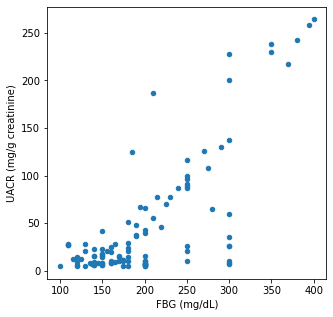

In [7]:
#draw data
data.plot(kind='scatter', x='FBG (mg/dL)',y='UACR (mg/g creatinine)', figsize=(5,5)) #scatter mean data showes as points &FBG,UACR are names for x axis and y axis 'relation between 1st column and last one' &figsize for size 5*5 

In [8]:
#adding a new column called ones at the beganing of data at index 1
#ones column is X0 to make linear equation correct
data.insert(1,'Ones',1) #first 1 for index of column and 'ones' for name of column last 1 for what column contain
print('New data : \n',data.head(10))

New data : 
    FBG (mg/dL)  Ones  HbA1C (%)  Total cholesterol (mg/dL)  \
0          140     1        8.7                        144   
1          135     1        7.5                        170   
2          140     1        8.0                        180   
3          190     1       14.0                        122   
4          250     1       13.5                        167   
5          120     1        8.9                        200   
6          200     1       15.0                        165   
7          110     1       10.0                        120   
8          180     1       15.0                        143   
9          150     1        9.1                        110   

   UACR (mg/g creatinine)  
0                    16.0  
1                     8.0  
2                    23.0  
3                    38.0  
4                    21.0  
5                     6.5  
6                    42.5  
7                    27.0  
8                    51.0  
9                    16.

In [11]:
#seperate data into x(training data), y(target variables)
x = data.iloc[:,[0,1]] #read all rows in columns 0,1
y = data.iloc[:,-1] #read all rows in last column
print("X data /n",x.head)
print("Y data /n",y.head)

X data /n <bound method NDFrame.head of      FBG (mg/dL)  Ones
0            140     1
1            135     1
2            140     1
3            190     1
4            250     1
..           ...   ...
105          300     1
106          130     1
107          250     1
108          170     1
109          200     1

[110 rows x 2 columns]>
Y data /n <bound method NDFrame.head of 0       16.0
1        8.0
2       23.0
3       38.0
4       21.0
       ...  
105    200.0
106      5.0
107     89.0
108     10.1
109     66.4
Name: UACR (mg/g creatinine), Length: 110, dtype: float64>


In [15]:
#normalizing traning data 'important step' 
minValue = x.iloc[:,0].min() #only make normalization for firest column in x cuz second column ix X0 =1
maxValue = x.iloc[:,0].max()

x.iloc[:,0]=(x.iloc[:,0]-minValue)/(maxValue-minValue)

print("X data :\n", x.head())

X data :
    FBG (mg/dL)  Ones
0     0.133333     1
1     0.116667     1
2     0.133333     1
3     0.300000     1
4     0.500000     1


C:\Users\10-Me22\anaconda1\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
#convert from data frame to numpy matrics 'convert data from list to array'
x = np.array(x)
y = np.array(y).flatten() #using flatten to make y one vector
theta = np.array([0,0]) #theta means theta0 &theta1 that I use in linear equation

print("X \n", x)
print('X shape \n', x.shape)
print('theta \n', theta)
print('theta shape \n', theta.shape)
print("Y \n", y)
print('Y.shape \n', y.shape)

X 
 [[0.13333333 1.        ]
 [0.11666667 1.        ]
 [0.13333333 1.        ]
 [0.3        1.        ]
 [0.5        1.        ]
 [0.06666667 1.        ]
 [0.33333333 1.        ]
 [0.03333333 1.        ]
 [0.26666667 1.        ]
 [0.16666667 1.        ]
 [0.2        1.        ]
 [0.13333333 1.        ]
 [0.3        1.        ]
 [0.16666667 1.        ]
 [0.08333333 1.        ]
 [0.66666667 1.        ]
 [0.15       1.        ]
 [0.26666667 1.        ]
 [0.6        1.        ]
 [0.4        1.        ]
 [0.66666667 1.        ]
 [0.03333333 1.        ]
 [0.06666667 1.        ]
 [0.1        1.        ]
 [0.26666667 1.        ]
 [0.1        1.        ]
 [0.18333333 1.        ]
 [0.26666667 1.        ]
 [0.16666667 1.        ]
 [0.66666667 1.        ]
 [0.16666667 1.        ]
 [0.36666667 1.        ]
 [0.33333333 1.        ]
 [0.3        1.        ]
 [0.13333333 1.        ]
 [0.33333333 1.        ]
 [0.36666667 1.        ]
 [0.66666667 1.        ]
 [0.23333333 1.        ]
 [0.25       1.      

In [24]:
#cost function
#number of training examples
m = len(y) #m is number of rows can take it from len(x) or len(y)
def cost_function(x, y, theta):
    #calculate cost with given parameter
    j = np.sum((x.dot(theta)-y)**2)/2/m #sum (theta0 *X0 +theta1*X1-y)^2
    return j


In [25]:
#first run for function
cost1 = cost_function(x,y,theta)
print(cost1)

3141.7108181818176


In [31]:
#set itration and alpha
iterations =1000
alpha = 0.00001

In [33]:
#Geadient Desent 'GD' function
def gradirnt_descent(x, y, theta, alpha, iterations):
    cost_history = [0] * iterations #list to put cost function on it
    for iteration in range(iterations): #iteration loops 1000 time 0:999
        hypothesis = x.dot(theta)  #first i want to get hypothesis function "theta0*X0 +theta1*X1" 1st
        loss = hypothesis-y #means 'theta0*X0 +theta1*X1-y' 2nd
        gradient = x.T.dot(loss)/m  #means "(theta0*X0 +theta1*X1-y)*x /m" 3rd
        theta = theta - (alpha*gradient) # alpha*gradient is last step in grident descent equation 4rd then I calculate new theta0 and theta1
        cost = cost_function(x, y, theta) #here we calculate cost agan to know errore rate reduced or no
        cost_history[iteration] = cost #here i store cost to knoe whay happend whether it reduced or not at evrey itration
        
    return theta, cost_history 

In [34]:
#perform gradient descent to 'fit' the model parameters
(t, c) = gradirnt_descent(x, y, theta, alpha, iterations)

#print theta parameyters
print(t) #[theta0, theta1]

[0.26710297 0.47317992]


No handles with labels found to put in legend.


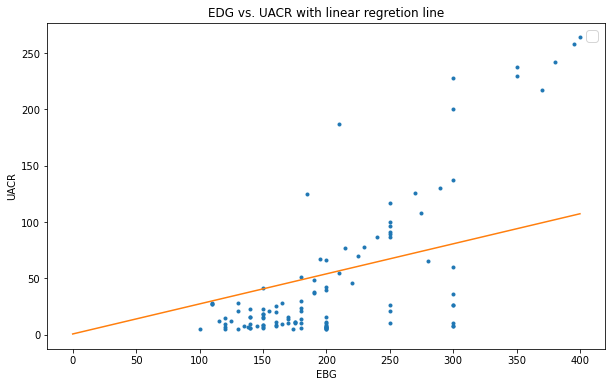

In [36]:
#get best fit line
best_fit_x = np.linspace(0,400, 400)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x] #t1 represent theta0 cuz I put X0 at index1 & t0*xx represent features

#plotting best fit line
plt.figure(figsize=(10,6))
plt.plot(data.iloc[:,0],y , '.') #drow relation between ferst column of x and y (as dots'.')
plt.plot(best_fit_x, best_fit_y, '-') #to drow best fit line for data (as dashes'-')

#some extra info
plt.xlabel('EBG')
plt.ylabel('UACR')
plt.title('EDG vs. UACR with linear regretion line')
plt.legend(loc=1, prop={'size': 15}) 
plt.show()